# What is  Machine Learning - 5 Mins
1. ML is a technique where a certain algorithm accepts inputs and predicts a target variable. 
2. The way this is achieved is by training the algorithm on a sample of dataset
3. There is cost function which is monitored as it is moving through the data pooints.
4. The algorithm tries to reduce the cost function as much as possible.
5. By doing so the algorithm gets closer to predicting correct values

<img src="./MLTrainingPhase.jpg">
<img src="./MLTrainingPhase2.jpg">
<img src="./regression vs classification.jpg">

In [2]:
from IPython.display import Video

Video("linear_regression_plot_animation.mp4")

# Unsupervised Learning 
* The art of drawing inferences from data which does not have <b>labels (target,Y)</b>. 
* We are not trying to predict a label, we are trying to group data together on some similar attributes.

## 1. Clustering
* creating groups out of data points based on closeness.
* Dividing the data into clusters can be on the basis of centroids, distributions, densities, etc

### Clustering Use cases

#### 1. Image segmentation
<img src="./pavel.jpg">

#### 2. Market Segmentation

### How KMeans works - Individual Activity - (5 mins)
go to the link and try choosing centroids to see how kmeans works visually:https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Follow-up Question: Was it easy to decide clusters always?

### Breakout Room Group Activity 1- (15 minutes)
* You will be divided into pairs and will run the code in activity 1 notebook on an image of your choice.
* Notebook is provided on slack channel
* you have to decide number of clusters to segment the image 
* what if you use different clusters what is the effect
* I will ask one from each group to present the result

#### Kmeans algorithm
1. decide number of clusters
2. select random centroids and iterations
3. find closest points
4. update centroids
5. repeat 3 and 4 till iterations complete

<img src="./kmeans1.jpg">


The k-medoids algorithm is a clustering approach related to k-means clustering
for partitioning a data set into k groups or clusters. In k-medoids clustering,
each cluster is represented by one of the data point in the cluster. These points are
named cluster medoids.

The term medoid refers to an object within a cluster for which average dissimilarity
between it and all the other the members of the cluster is minimal. It corresponds to
the most centrally located point in the cluster. These objects (one per cluster) can
be considered as a representative example of the members of that cluster which may
be useful in some situations. Recall that, in k-means clustering, the center of a given
cluster is calculated as the mean value of all the data points in the cluster.

#### What if you cannot plot the data?
* The country data below has many variables ( more than 2/3 dimensions)
* You cannot decide clusters looking at the data

<b>The below tutorial has been adapted from the following kaggle notebook.</b>

<b>[source: https://www.kaggle.com/chandrimad31/different-clustering-techniques-country-profiles ]</b>

In [2]:
import pandas as pd
country_df = pd.read_csv('./Country-data.csv')

In [3]:
country_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


#### installing yellowbrick for visualization

In [15]:
!pip install yellowbrick

#### scale data

In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_scaled=sc.fit_transform(country_df.drop(['country'],axis=1))

#### Introducing Elbow Curve

In [9]:
# #Plotting Elbow Curve
# from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer
# from sklearn import metrics

# model = KMeans()
# visualizer = KElbowVisualizer(model, k=(1,10))
# visualizer.fit(data_scaled)    
# visualizer.poof()

In [12]:
from sklearn.cluster import KMeans

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

C:\Users\Arunabh\miniconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


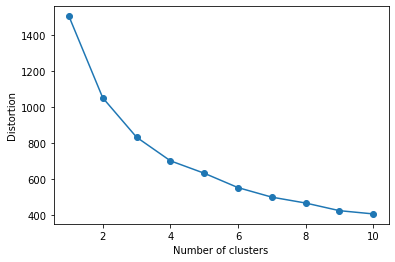

In [14]:
plot_distortion(data_scaled)

In [15]:
#Fitting data into K-Means model with 3 clusters
km_3=KMeans(n_clusters=3,random_state=12345)
km_3.fit(data_scaled)
print(km_3.cluster_centers_)

[[-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]


In [16]:
# count of points in each cluster
pd.Series(km_3.labels_).value_counts()

0    84
1    47
2    36
dtype: int64

#### combine original country data with labels

In [17]:
#country_df['cluster_no'] = pd.Series(km_3._labels_)
scaled_df = pd.DataFrame(data_scaled)
scaled_df['9'] = pd.Series(km_3.labels_)

In [18]:
scaled_df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,0
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,0
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,0
5,-0.591177,-0.812628,0.468966,-1.279787,0.080920,1.244725,0.591474,-0.382933,-0.145791,0
6,-0.501643,-0.743107,-0.882089,-0.065883,-0.543421,-0.001123,0.309514,-0.833471,-0.533233,0
7,-0.832423,-0.779697,0.699011,-1.076779,1.261966,-0.628316,1.290735,-0.674457,2.130699,2
8,-0.844858,0.372890,1.527901,0.037693,1.355617,-0.655549,1.121559,-0.999109,1.857082,2
9,0.023128,0.482661,-0.341667,-1.085065,-0.059556,0.571037,-0.164178,-0.681083,-0.389857,0


#### Let us reduce the dimension using PCA to check how these clusters look
PCA will be covered extensively in the following lecture. for today, it is only a tool that is used to reduce n-dimensional data to 2-d so it can be visualized

In [19]:
scaled_df.at[0,'9']

1

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(scaled_df)
pca_2d = pca.transform(scaled_df)

In [21]:
pca_2d

array([[-2.81289051e+00,  2.05834722e-01],
       [ 2.90462518e-01, -7.02677083e-01],
       [-4.08509840e-01, -5.43374582e-01],
       [-2.83281707e+00,  1.79293469e+00],
       [ 8.98447739e-01,  3.44087092e-02],
       [-8.91302929e-02, -1.82376837e+00],
       [-2.42025490e-01, -6.93167183e-01],
       [ 2.53292886e+00, -1.86183561e+00],
       [ 3.15754670e+00, -6.20581780e-01],
       [-2.95793127e-01, -4.68099746e-01],
       [ 1.15366020e+00, -7.04125448e-01],
       [ 1.83675932e+00,  6.05520398e-01],
       [-1.24369124e+00, -1.05240653e+00],
       [ 9.52164361e-01, -5.65044330e-01],
       [ 4.39976379e-01,  4.17219590e-01],
       [ 3.32319874e+00,  7.61687935e-01],
       [ 7.98386299e-02,  5.90191545e-01],
       [-2.58638240e+00,  4.91744113e-01],
       [-2.84310982e-01,  6.72554522e-01],
       [-9.05861670e-01, -1.92895304e-01],
       [ 8.59640755e-01, -1.06582094e+00],
       [-8.22414599e-01,  5.02659427e-01],
       [ 2.70408753e-02, -2.19891053e+00],
       [ 2.

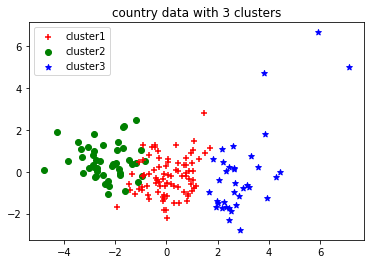

In [22]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
    if  scaled_df.at[i,'9']== 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',
    marker='+')
    elif scaled_df.at[i,'9'] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',
    marker='o')
    elif scaled_df.at[i,'9'] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',
    marker='*')
pl.legend([c1, c2, c3], ['cluster1', 'cluster2',
    'cluster3'])
pl.title('country data with 3 clusters')
pl.show()

* The visualization may be misleading because it is a projection of n-dimensional space to 2-D space.
* However, this is the best way to visualize and see how the clusters formed look

### To think about?
* In your spare time, think about how else can k-means clusters be visualized
* try kmeans followed by PCA and visualiation on other(smaller/bigger data to check if clusters are correctly identified this way)

## Hierchical Clustering
Hierarchical clustering Technique:

Hierarchical clustering is one of the popular and easy to understand clustering technique. 

This clustering technique is divided into two types:
* Agglomerative
* Divisive

#### Technique: 
Agglomerative Hierarchical clustering Technique: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward:
* Compute the proximity matrix
* Let each data point be a cluster
* Repeat: Merge the two closest clusters and update the proximity matrix
* Until only a single cluster remains

Key operation is the computation of the proximity of two clusters
To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

<img src='img1.jpg'>
<img src='img2.jpg'>
<img src='img3.jpg'>
<img src='img4.jpg'>
<img src='img5.jpg'>
<img src='img6.jpg'>
<img src='img7.jpg'>
<img src='img8.jpg'>

#### [ source:https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec ]

### Linkage Criteria
* How are you going to calculate distance between two smallest clusters and group them based on min distance
* There isnt a single way to do this

### Types of Linkage
<img src="./singlelinkdist.jpg"/>
<img src="./completelinkdist.jpg"/>
<img src="./avglinkdist.jpg"/>
<img src="./wardlinkage.jpg"/>

## Clustering Demo using <code>iris</code> dataset

In [23]:
from sklearn import datasets

iris = datasets.load_iris()

View the data first 10 samples

In [24]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

#### view the <code>target</code> labels.

In [25]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(iris.data)

In [30]:
# Hierarchical clustering using complete linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(iris.data)

# Hierarchical clustering using average linkage
# TODO: Create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage="average")
# Fit & predict
# TODO: Make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(iris.data)

To determine which clustering result better matches the original labels of the samples, we can use ```adjusted_rand_score``` which is an *external cluster validation index* which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).

[source: 'Udacity' ]

In [31]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)

In [32]:
# TODO: Calculated the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(iris.target, complete_pred)

# TODO: Calculated the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(iris.target, avg_pred)

Which algorithm has higher <code> adjusted_rand_score</code>

In [33]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.7311985567707746 
Complete:  0.6422512518362898 
Average:  0.7591987071071522


To visualize the cluster result we will use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy

In [36]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values
# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'ward'

linkage_matrix = linkage(iris.data, linkage_type)

#### Plot <code>linkage</code> matrix using <code>dendogram</code> in <code>scipy</code>

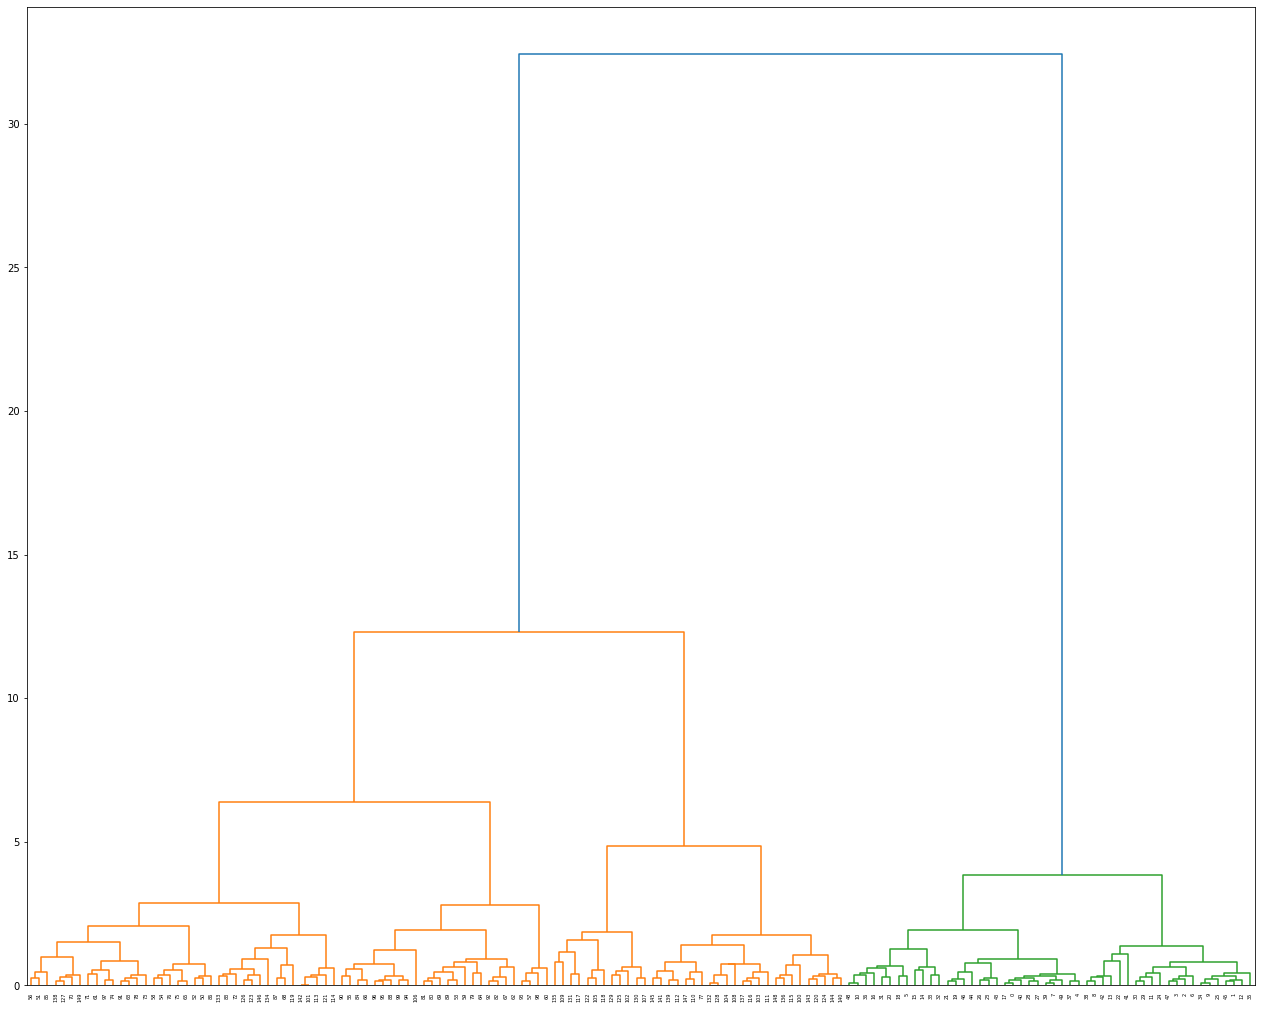

In [37]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(22,18))

dendrogram(linkage_matrix,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

## DBScan(Density-Based Spatial Clustering of Applications with Noise)
* DBSCAN is a nice alternative to k-means when you don't know how many clusters to expect in your data, but you do know something about how the points should be clustered in terms of density (distance between points in a cluster).

* DBSCAN datapoints do not have to be spatial data; they can be color data, intensity values, or other numerical features! This means we can cluster not only based upon proximity, but we can cluster similarly colored objects!


#### [source: 'https://github.com/chriswernst/dbscan-python']

### How DBScan Works?
Consider a set of points in some space to be clustered. Let ε be a parameter specifying the radius of a neighborhood with respect to some point. For the purpose of DBSCAN clustering, the points are classified as core points, (density-)reachable points and outliers, as follows:

* A point p is a core point if at least minPts points are within distance ε of it (including p).
* A point q is directly reachable from p if point q is within distance ε from core point p. Points are only said to be directly reachable from core points.
* A point q is reachable from p if there is a path p1, ..., pn with p1 = p and pn = q, where each pi+1 is directly reachable from pi. Note that this implies that the initial point and all points on the path must be core points, with the possible exception of q.
* All points not reachable from any other point are outliers or noise points.

Now if p is a core point, then it forms a cluster together with all points (core or non-core) that are reachable from it. Each cluster contains at least one core point; non-core points can be part of a cluster, but they form its "edge", since they cannot be used to reach more points.

<img src='https://www.mdpi.com/applsci/applsci-09-04398/article_deploy/html/images/applsci-09-04398-g001.png' />

[source: Wikipedia]

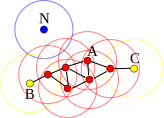

In [31]:
from IPython.display import SVG, display
display(SVG(url='https://upload.wikimedia.org/wikipedia/commons/a/af/DBSCAN-Illustration.svg'))

### Group/Breakout Activity 2 (7 minutes)
* 1. go to the following link:https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
* 2. play around with <code>epsilon</code> and <code>minPoints</code> and find right amount of clusters
* 3. after playing around with simple examples, try it on DB Scan rings example. Can you cluster all of the different points correctly?

### Additional Resources: sky is the limit. 
* Try new datasets from Kaggle/data repositories and apply different clustering techniques on them.
* Analyze your results and learn from them.